In [14]:
import pandas as pd
import numpy as np

In [15]:
salary_data = pd.read_csv('Salary.csv')

In [16]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [17]:
salary_data.shape

(35, 2)

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

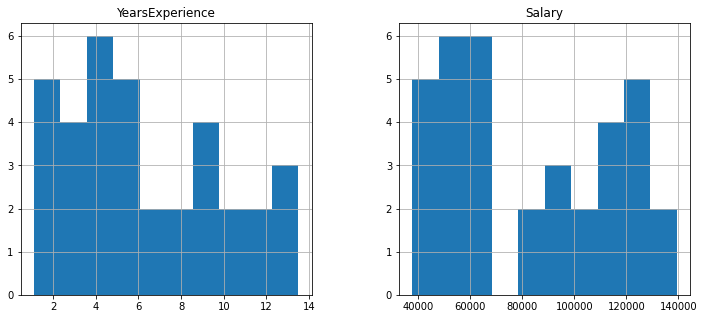

In [18]:
salary_data.hist(figsize=(12 ,5))

In [20]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [21]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [28]:
X = salary_data.iloc[:,0].values
y = salary_data.iloc[:,1].values
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [29]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [30]:
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872],
       [127345],
       [126756],
       [128765],
       [135675],
       [139465]])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26, 1)
(9, 1)
(26, 1)
(9, 1)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.coef_

array([[8603.62770643]])

In [43]:
y_prediction = model.predict(X_test)
y_prediction.astype(int)

array([[110600],
       [ 64141],
       [103717],
       [ 89951],
       [ 71023],
       [119204],
       [ 80487],
       [ 63280],
       [ 56397]])

In [44]:
y_test

array([[116969],
       [ 57081],
       [109431],
       [ 98273],
       [ 67938],
       [121872],
       [ 93940],
       [ 56957],
       [ 64445]])

In [47]:
df = pd.DataFrame(data=y_test,columns=['original value'])
df['predicted value'] = y_prediction.astype(int)
df

,original value,predicted value
0,116969,110600
1,57081,64141
2,109431,103717
3,98273,89951
4,67938,71023
5,121872,119204
6,93940,80487
7,56957,63280
8,64445,56397


In [51]:
model.score(X_test, y_test)*100

90.94204577612953

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

lr_r2_score = r2_score(y_test,y_prediction)
lr_r2_score

0.9094204577612953

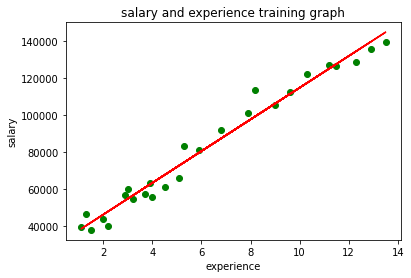

In [55]:
# visualized representation
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('salary and experience training graph')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()

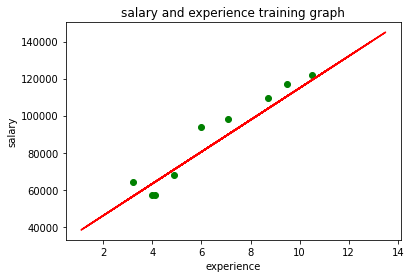

In [56]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('salary and experience training graph')
plt.xlabel('experience')
plt.ylabel('salary')
plt.show()